In [ ]:
# student 1: Ziv Katzir
# student 2: Reut Mesilaty
# student 3: Matan Ben-Yosef
# student 4: Shai Shillo

## Imports

In [1]:
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Scaling
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score

# Models Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix

# Split the training data into training and validation sets 
from sklearn.model_selection import train_test_split

In [2]:
# Load the training and test datasets
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

# Exploratory Data Analysis (EDA)

In [3]:
# Display the first 5 rows
print(train_df.head())
print(test_df.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


## Display basic statistics


### Train 

In [4]:
print(train_df.describe())


           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.000000  
max      3.000

### Test

In [5]:
print(test_df.describe())

           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  179.000000  179.000000  179.000000  179.000000  179.000000  179.000000   
mean     2.363128    0.675978   30.366983    0.502793    0.368715   31.507239   
std      0.812116    0.469321   12.246691    1.278053    0.819923   49.254330   
min      1.000000    0.000000    0.420000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000   24.000000    0.000000    0.000000    7.895800   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   12.000000   
75%      3.000000    1.000000   36.000000    1.000000    0.000000   27.825000   
max      3.000000    1.000000   71.000000    8.000000    5.000000  263.000000   

         Embarked    Survived  
count  179.000000  179.000000  
mean     0.351955    0.340782  
std      0.639640    0.475302  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.000000  
max      3.000

# Visualizations

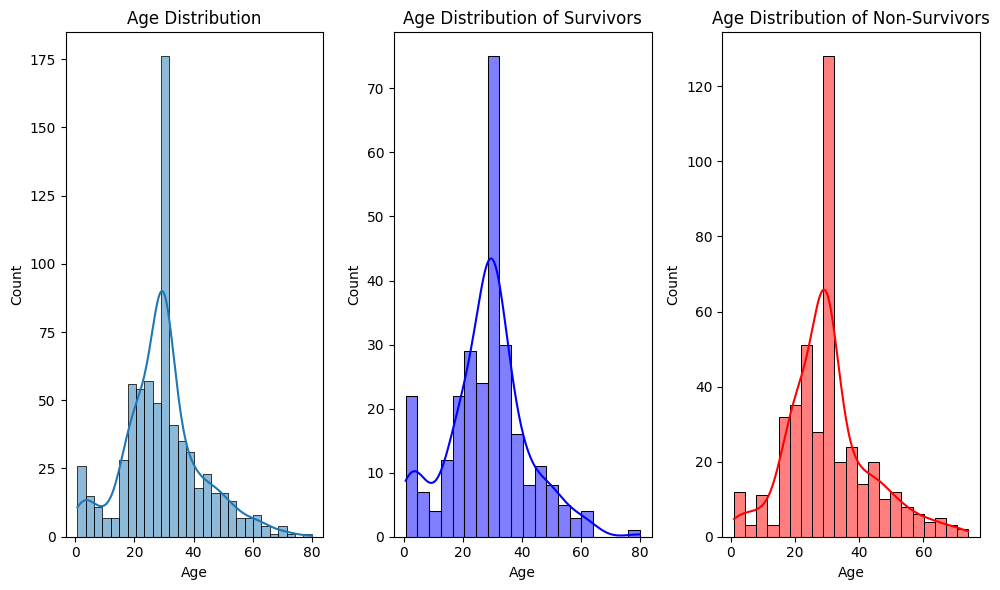

In [58]:
# Plotting side by side
fig, axes = plt.subplots(1, 3, figsize=(10, 6))  # Adjust figsize for larger plots

# Plot 1: Age Distribution
sns.histplot(train_df['Age'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Plot 2: Age Distribution of Survivors
sns.histplot(train_df[train_df['Survived'] == 1]['Age'].dropna(), kde=True, color='blue', ax=axes[1])
axes[1].set_title('Age Distribution of Survivors')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

# Plot 3: Age Distribution of Non-Survivors
sns.histplot(train_df[train_df['Survived'] == 0]['Age'].dropna(), kde=True, color='red', ax=axes[2])
axes[2].set_title('Age Distribution of Non-Survivors')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


### Age Distribution Analysis

The plots below provide an overview of the age demographics of passengers on the Titanic, with separate visualizations for survivors and non-survivors.

#### Age Distribution

This plot provides an overview of the age demographics of passengers on the Titanic. The KDE (Kernel Density Estimate) overlay helps in understanding the density and distribution of ages more smoothly.

**Key Observations:**
- Passengers' ages vary widely, from infants to the elderly.
- A significant number of passengers are aged between 20 to 40, with a peak around 30 years old.
- Fewer infants and elderly passengers, indicating lower numbers of children and older adults on board.

#### Age Distribution of Survivors

This plot shows the age distribution of passengers who survived the Titanic disaster.

**Key Observations:**
- Many survivors are aged between 20 to 40.
- Noticeable peak in the survival rate among young children (under 10 years).

#### Age Distribution of Non-Survivors

This plot shows the age distribution of passengers who did not survive the Titanic disaster.

**Key Observations:**
- High number of non-survivors aged between 20 to 40.
- Fewer non-survivors among young children, suggesting they were prioritized during evacuation.
- Lower survival rate among elderly passengers.

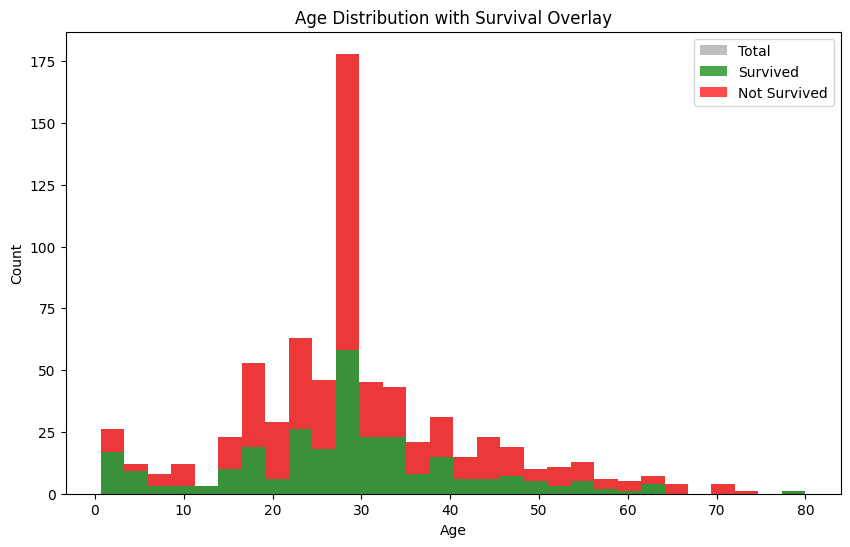

In [49]:
# Separate the survivors and non-survivors
survived = train_df[train_df['Survived'] == 1]['Age'].dropna()
not_survived = train_df[train_df['Survived'] == 0]['Age'].dropna()

# Calculate the histograms
total_counts, bin_edges = np.histogram(train_df['Age'].dropna(), bins=30)
survived_counts, _ = np.histogram(survived, bins=30)
not_survived_counts = total_counts - survived_counts

# Plotting the age distribution
plt.figure(figsize=(10, 6))
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot total counts (gray) as the base
plt.bar(bin_centers, total_counts, width=bin_edges[1] - bin_edges[0], color='gray', label='Total', alpha=0.5)

# Plot survived counts (green) on top of total counts
plt.bar(bin_centers, survived_counts, width=bin_edges[1] - bin_edges[0], color='green', label='Survived', alpha=0.7)

# Plot not survived counts (red) as the delta
plt.bar(bin_centers, not_survived_counts, width=bin_edges[1] - bin_edges[0], bottom=survived_counts, color='red', label='Not Survived', alpha=0.7)

plt.title('Age Distribution with Survival Overlay')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

plt.show()

### Insights:
- **Highest Survival Rate**: Young children (under 10 years old) had the highest survival rate, likely due to being prioritized during rescue operations.
- **Lowest Survival Rate**: Elderly passengers (above 60 years old) had the lowest survival rate, potentially due to physical limitations and lower priority during evacuation.
- **Middle Age Group (20-40 years old)**: This group had a significant number of both survivors and non-survivors, suggesting a mixed survival rate. The peak around 30 years old in both plots indicates many passengers in this age range, with a substantial number not surviving.

 **Overall Distribution**:
   - The age group around 30 years had the highest number of passengers, contributing to the prominent spike in the total count.
   - Across all age groups, there were more non-survivors (red bars) than survivors (green bars), indicating the overall high fatality rate of the Titanic disaster.

By analyzing these plots, we can infer that age was a significant factor in survival rates on the Titanic, with younger passengers having a higher likelihood of survival compared to older passengers.








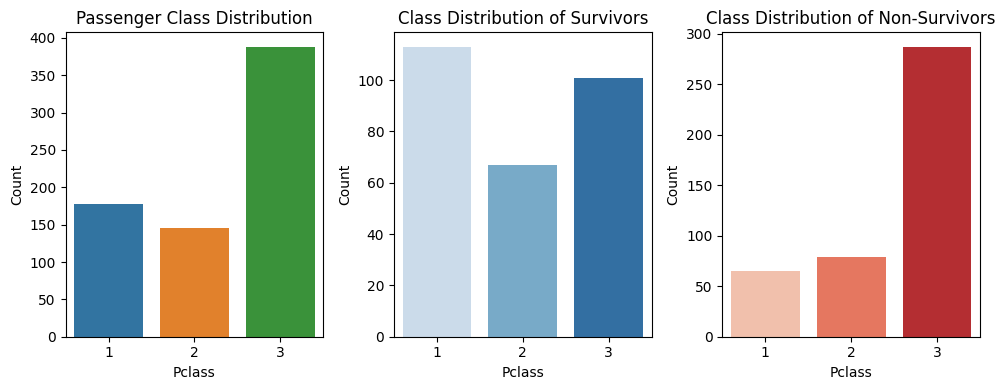

In [63]:
# Plotting side by side
fig, axes = plt.subplots(1, 3, figsize=(10, 4))  # Adjust figsize for larger plots

# Plot 1: Passenger Class Distribution
sns.countplot(x='Pclass', data=train_df, ax=axes[0])
axes[0].set_title('Passenger Class Distribution')
axes[0].set_xlabel('Pclass')
axes[0].set_ylabel('Count')

# Plot 2: Passenger Class Distribution of Survivors
sns.countplot(x='Pclass', data=train_df[train_df['Survived'] == 1], palette='Blues', ax=axes[1])
axes[1].set_title('Class Distribution of Survivors')
axes[1].set_xlabel('Pclass')
axes[1].set_ylabel('Count')

# Plot 3: Passenger Class Distribution of Non-Survivors
sns.countplot(x='Pclass', data=train_df[train_df['Survived'] == 0], palette='Reds', ax=axes[2])
axes[2].set_title('Class Distribution of Non-Survivors')
axes[2].set_xlabel('Pclass')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


### Passenger Class Distribution Analysis

The plots below show the distribution of passengers across the three different classes on the Titanic, with separate visualizations for survivors and non-survivors.

#### Passenger Class Distribution

This plot shows the distribution of passengers across the three different classes on the Titanic.

**Key Observations:**
- Majority of passengers traveled in the third class, followed by the first class, with the least number in the second class.
- Indicates more economically disadvantaged passengers (third class) compared to wealthier passengers (first class).

#### Passenger Class Distribution of Survivors

This plot shows the distribution of passenger classes among those who survived the Titanic disaster.

**Key Observations:**
- First class passengers have the highest count among survivors, indicating a higher survival rate.
- Second class passengers have a moderate count, suggesting a decent survival rate.
- Third class passengers have the lowest count among survivors, indicating a lower survival rate.

#### Passenger Class Distribution of Non-Survivors

This plot shows the distribution of passenger classes among those who did not survive the Titanic disaster.

**Key Observations:**
- Third class passengers have the highest count among non-survivors, reflecting a lower survival rate.
- Second class passengers have a moderate count, indicating a mixed survival rate.
- First class passengers have the lowest count among non-survivors, suggesting a higher survival rate.

### Insights:

- **First Class**: Passengers in first class had the highest survival rate. This could be due to better access to lifeboats and higher priority during evacuation.
- **Second Class**: Passengers in second class had a moderate survival rate, with a significant number of both survivors and non-survivors.
- **Third Class**: Passengers in third class had the lowest survival rate. This could be due to their location on the ship, further from lifeboats, and possibly lower priority during evacuation.


- Socio-economic status played a significant role in survival rates on the Titanic, with higher class passengers having a better chance of survival compared to lower class passengers.


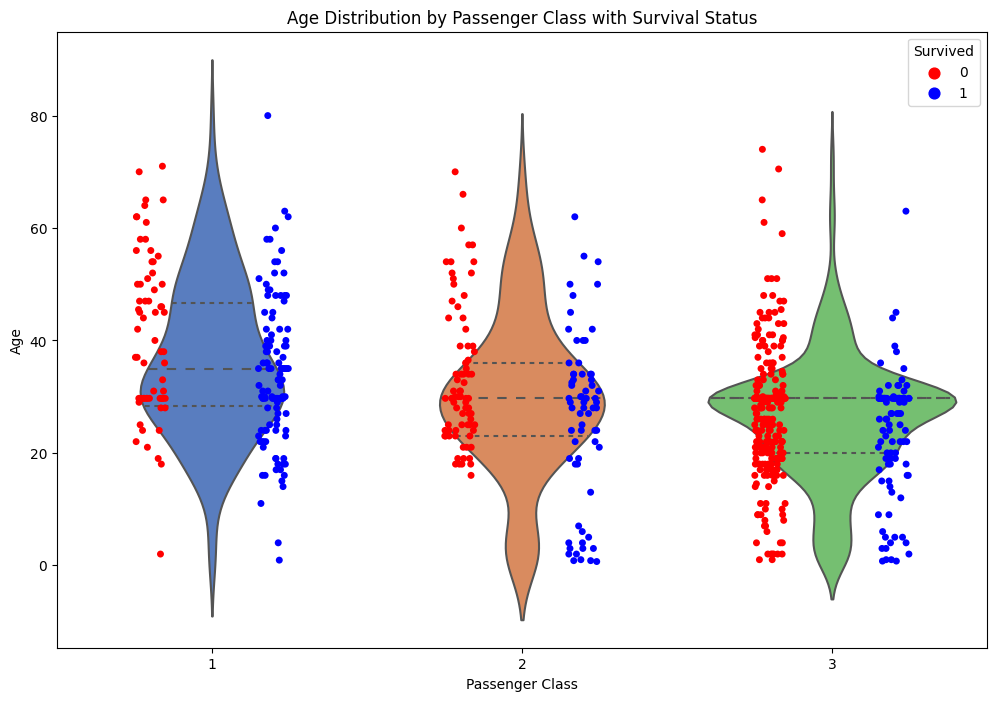

In [65]:
plt.figure(figsize=(12, 8))

# Violin plot for age distribution by passenger class
sns.violinplot(x='Pclass', y='Age', data=train_df, palette='muted', inner='quartile')

# Strip plot to show individual survival status
sns.stripplot(x='Pclass', y='Age', data=train_df, hue='Survived', jitter=True, palette={0: 'red', 1: 'blue'}, dodge=True)

plt.title('Age Distribution by Passenger Class with Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.legend(title='Survived', loc='upper right')
plt.show()

### Age Distribution by Passenger Class with Survival Status

This plot combines a violin plot and a strip plot to show the age distribution of passengers in each class on the Titanic, along with their survival status.

#### Key Observations:
- **First Class**: The age distribution is varied, with many older passengers. Blue points (survivors) are more prevalent than red points (non-survivors), indicating a higher survival rate among first-class passengers.
- **Second Class**: The age distribution shows a range of ages with a balanced number of survivors and non-survivors. The survival rate is moderate.
- **Third Class**: The age distribution is skewed towards younger passengers. Red points dominate, indicating a lower survival rate among third-class passengers.

#### Insights:
- **Survival and Age in First Class**: Older passengers in first class had better survival chances compared to younger passengers in third class. This could be due to better access to lifeboats and priority during evacuation.
- **Survival Rate in Third Class**: The dominance of red points in the third-class group shows a lower survival rate, possibly due to their location on the ship and lower priority during evacuation.
- **Middle-Aged Passengers**: Passengers aged 20-40 are revalent in all classes, but their survival chances vary significantly with class. First-class passengers in this age group had better survival rates compared to those in third class.

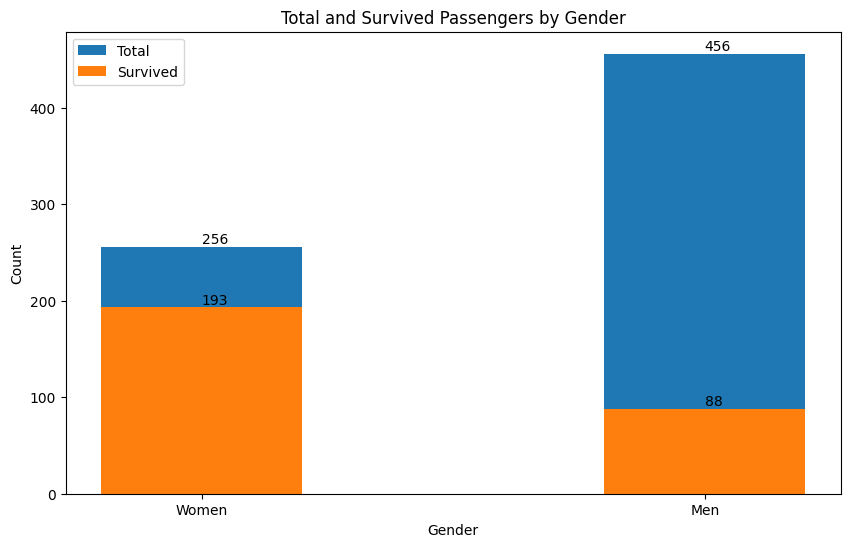

In [14]:
# Data for plotting
gender_counts = ['Women', 'Men']
total_counts = [256, 456]
survived_counts = [193, 88]

# Creating a DataFrame for easier plotting
plot_df = pd.DataFrame({
    'Gender': gender_counts,
    'Total': total_counts,
    'Survived': survived_counts
})

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.4
bar1 = plt.bar(plot_df['Gender'], plot_df['Total'], width=bar_width, label='Total')
bar2 = plt.bar(plot_df['Gender'], plot_df['Survived'], width=bar_width, label='Survived')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Total and Survived Passengers by Gender')
plt.legend()

# Adding text labels on bars
for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')
    
for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')

plt.show()

### Total and Survived Passengers by Gender

This plot shows the total number of passengers and the number of survivors on the Titanic, separated by gender.

Key Observations:
- **Total Passengers**:
  - There were 256 women and 456 men on the Titanic.
- **Survived Passengers**:
  - Among the 256 women, 193 survived.
  - Among the 456 men, only 88 survived.

### Insights:
- **Higher Survival Rate for Women**:
  - A significantly higher proportion of women survived compared to men. 
  - This suggests that women were likely given priority during the evacuation process, aligning with the "women and children first" policy often noted in historical accounts of the Titanic disaster.
- **Lower Survival Rate for Men**:
  - The survival rate for men was much lower, indicating that men were likely given less priority during evacuation.

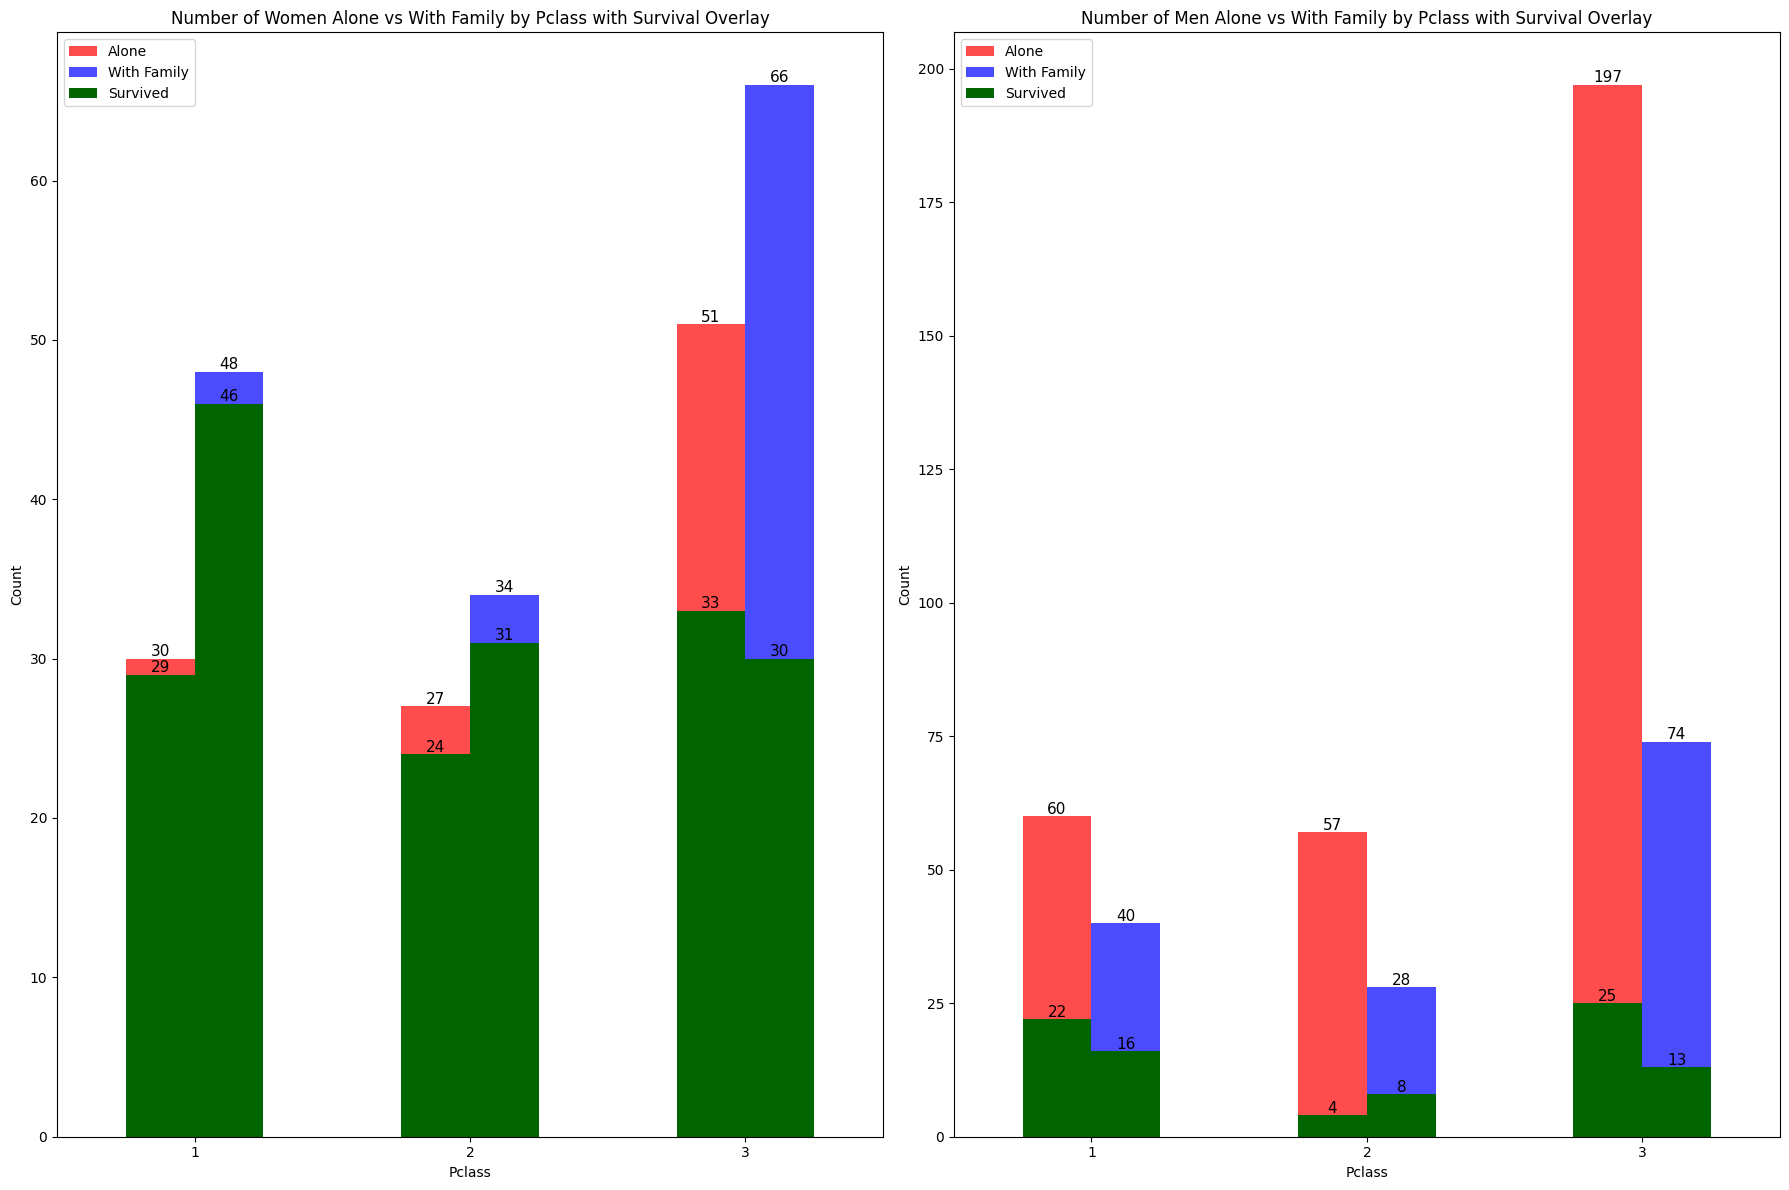

In [47]:
# Filter the data for women
women_df = train_df[train_df['Sex_1'] == 0]

# Count the total number of women alone and with family by Pclass
alone_counts = women_df[women_df['IsAlone'] == 1].groupby('Pclass').size()
family_counts = women_df[women_df['IsAlone'] == 0].groupby('Pclass').size()

# Count the number of women alone and with family who survived by Pclass
alone_survived_counts = women_df[(women_df['IsAlone'] == 1) & (women_df['Survived'] == 1)].groupby('Pclass').size()
family_survived_counts = women_df[(women_df['IsAlone'] == 0) & (women_df['Survived'] == 1)].groupby('Pclass').size()

# Create a DataFrame for easy plotting
plot_data = pd.DataFrame({
    'Alone': alone_counts,
    'Alone Survived': alone_survived_counts,
    'With Family': family_counts,
    'Family Survived': family_survived_counts
}).fillna(0).astype(int)

# Filter the data for men
men_df = train_df[train_df['Sex_1'] == 1]

# Count the total number of men alone and with family by Pclass
alone_counts_men = men_df[men_df['IsAlone'] == 1].groupby('Pclass').size()
family_counts_men = men_df[men_df['IsAlone'] == 0].groupby('Pclass').size()

# Count the number of men alone and with family who survived by Pclass
alone_survived_counts_men = men_df[(men_df['IsAlone'] == 1) & (men_df['Survived'] == 1)].groupby('Pclass').size()
family_survived_counts_men = men_df[(men_df['IsAlone'] == 0) & (men_df['Survived'] == 1)].groupby('Pclass').size()

# Create a DataFrame for easy plotting
plot_data_men = pd.DataFrame({
    'Alone': alone_counts_men,
    'Alone Survived': alone_survived_counts_men,
    'With Family': family_counts_men,
    'Family Survived': family_survived_counts_men
}).fillna(0).astype(int)

# Plotting side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 12))

# Plotting women data
plot_data[['Alone', 'With Family']].plot(kind='bar', stacked=False, ax=axes[0], color=['red', 'blue'], alpha=0.7)
plot_data[['Alone Survived', 'Family Survived']].plot(kind='bar', stacked=False, ax=axes[0], color='darkgreen')

# Add count numbers on top of each bar for women
for p in axes[0].patches:
    axes[0].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

axes[0].set_title('Number of Women Alone vs With Family by Pclass with Survival Overlay')
axes[0].set_xlabel('Pclass')
axes[0].set_ylabel('Count')
axes[0].legend(['Alone', 'With Family', 'Survived'])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Plotting men data
plot_data_men[['Alone', 'With Family']].plot(kind='bar', stacked=False, ax=axes[1], color=['red', 'blue'], alpha=0.7)
plot_data_men[['Alone Survived', 'Family Survived']].plot(kind='bar', stacked=False, ax=axes[1], color='darkgreen')

# Add count numbers on top of each bar for men
for p in axes[1].patches:
    axes[1].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

axes[1].set_title('Number of Men Alone vs With Family by Pclass with Survival Overlay')
axes[1].set_xlabel('Pclass')
axes[1].set_ylabel('Count')
axes[1].legend(['Alone', 'With Family', 'Survived'])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

### Insights from Number of Women and Men Alone vs With Family by Pclass with Survival Overlay

The plots below show the number of women and men who were alone and those who came with family, split by Pclass. The green overlay indicates the number of survivors in each sub-section:

- **Red bars**: Number of passengers alone in each Pclass.
- **Blue bars**: Number of passengers with family in each Pclass.
- **Green bars**: Number of passengers who survived in each category.

| Pclass | Women | Men |
|--------|-------|-----|
| **First Class** |High survival rate among women with family (46 out of 48 survived). |Higher survival rate among men with family (16 out of 40 survived), but overall lower survival compared to women. |
| **Second Class** |Both categories had relatively high survival rates, with family survival being slightly higher. |Very low survival rates for both categories, with only 4 alone and 8 with family surviving. |
| **Third Class** |Lower survival rates compared to first and second class, but significant survival among women with family (30 out of 66 survived). |Very low survival rates overall, with only 25 alone and 13 with family surviving. |

### Conclusion

- **Women**: Women in first and second class had higher survival rates, especially those with family. Third-class women had lower survival rates, but still a notable number of survivors with family.
- **Men**: Men generally had lower survival rates across all classes compared to women. First-class men with family had the highest survival rates among men, but still lower compared to women. Third-class men had the lowest survival rates.

These insights highlight the significant impact of gender, family status, and passenger class on survival rates during the Titanic disaster.


# Feature Engineering

### Creating New Features

#### FamilySize
Combine 'SibSp' and 'Parch' to create a new feature 'FamilySize'.

In [15]:
# Creating FamilySize feature
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

print(train_df[['SibSp', 'Parch', 'FamilySize']].head())
print(test_df[['SibSp', 'Parch', 'FamilySize']].head())

   SibSp  Parch  FamilySize
0      1      0           2
1      0      0           1
2      0      0           1
3      0      0           1
4      0      0           1
   SibSp  Parch  FamilySize
0      0      0           1
1      0      0           1
2      0      0           1
3      0      0           1
4      0      0           1


### FamilySize FeatureExplanation

The 'FamilySize' feature is a new feature created by combining two existing features in the Titanic dataset: 'SibSp' (number of siblings/spouses aboard the Titanic) and 'Parch' (number of parents/children aboard the Titanic). This new feature represents the total number of family members that a passenger had aboard the Titanic, including themselves.

### Why Create This Feature?
The idea behind creating the 'FamilySize' feature is to capture the effect of traveling with family members on survival rates. Having family members could potentially influence a passenger's chances of survival in several ways:

##### Support and Assistance: 
Passengers with family might have had more support and assistance during the chaos of the disaster, possibly improving their chances of survival.
##### Evacuation Priority: 
Families, especially those with children, might have been given priority during the evacuation process.
##### Social Dynamics: 
The presence of family members could affect social dynamics and decision-making during the evacuation.
How It’s Created
The 'FamilySize' feature is created by simply adding the values of 'SibSp' and 'Parch', and then adding 1 to include the passenger themselves:

FamilySize
=
SibSp
+
Parch
+
1
FamilySize=SibSp+Parch+1

Example Calculation
If a passenger had 1 sibling/spouse and 2 parents/children aboard, their 'FamilySize' would be calculated as follows:

FamilySize
=
1
(
SibSp
)
+
2
(
Parch
)
+
1
(
Passenger themselves
)
=
4
FamilySize=1(SibSp)+2(Parch)+1(Passenger themselves)=4

#### IsAlone
Create a binary feature that indicates whether a passenger is alone or not.

In [16]:
# Creating IsAlone feature
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)

print(train_df[['FamilySize', 'IsAlone']].head())
print(test_df[['FamilySize', 'IsAlone']].head())

   FamilySize  IsAlone
0           2        0
1           1        1
2           1        1
3           1        1
4           1        1
   FamilySize  IsAlone
0           1        1
1           1        1
2           1        1
3           1        1
4           1        1


#### AgeGroup
Bin the 'Age' column into age groups.

In [17]:
# Creating AgeGroup feature
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[0, 12, 18, 25, 35, 60, 120], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior', 'Elder'])
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=[0, 12, 18, 25, 35, 60, 120], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior', 'Elder'])

print(train_df[['Age', 'AgeGroup']].head())
print(test_df[['Age', 'AgeGroup']].head())

    Age     AgeGroup
0  54.0       Senior
1  45.0       Senior
2  20.0  Young Adult
3  36.0       Senior
4  22.0  Young Adult
         Age     AgeGroup
0  35.000000        Adult
1  30.000000        Adult
2  29.699118        Adult
3  21.000000  Young Adult
4  32.000000        Adult


#### Age-Pclass Interaction
We can create a new feature by multiplying the 'Age' and 'Pclass' features. This feature will represent the combined effect of age and class on survival.

In [18]:
# Creating Age_Pclass interaction feature
train_df['Age_Pclass'] = train_df['Age'] * train_df['Pclass']
test_df['Age_Pclass'] = test_df['Age'] * test_df['Pclass']

print(train_df[['Age', 'Pclass', 'Age_Pclass']].head())
print(test_df[['Age', 'Pclass', 'Age_Pclass']].head())

    Age  Pclass  Age_Pclass
0  54.0       1        54.0
1  45.0       2        90.0
2  20.0       3        60.0
3  36.0       3       108.0
4  22.0       3        66.0
         Age  Pclass  Age_Pclass
0  35.000000       3  105.000000
1  30.000000       3   90.000000
2  29.699118       3   89.097353
3  21.000000       3   63.000000
4  32.000000       3   96.000000


### Encoding Categorical Features
Convert 'Sex', 'Embarked', and 'AgeGroup' into numerical values using one-hot encoding.

In [19]:
# Encoding categorical features
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked', 'AgeGroup'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked', 'AgeGroup'], drop_first=True)

print(train_df.head())
print(test_df.head())

   Pclass   Age  SibSp  Parch     Fare  Survived  FamilySize  IsAlone  \
0       1  54.0      1      0  78.2667         1           2        0   
1       2  45.0      0      0  13.5000         1           1        1   
2       3  20.0      0      0   9.5000         0           1        1   
3       3  36.0      0      0   7.8958         0           1        1   
4       3  22.0      0      0   8.0500         0           1        1   

   Age_Pclass  Sex_1  Embarked_1  Embarked_2  Embarked_3  AgeGroup_Teenager  \
0        54.0      0           1           0           0                  0   
1        90.0      0           0           0           0                  0   
2        60.0      1           0           0           0                  0   
3       108.0      1           0           0           0                  0   
4        66.0      1           0           0           0                  0   

   AgeGroup_Young Adult  AgeGroup_Adult  AgeGroup_Senior  AgeGroup_Elder  
0          

### Scaling Features
Standardize numerical features such as 'Age', 'Fare', 'FamilySize', and the new 'Age_Pclass' feature.

##### Standardization

In [20]:
# Scaling numerical features using StandardScaler
scaler_standard = StandardScaler()
numeric_features = ['Age', 'Fare', 'FamilySize', 'Age_Pclass']
train_df_standard = train_df.copy()
test_df_standard = test_df.copy()
train_df_standard[numeric_features] = scaler_standard.fit_transform(train_df_standard[numeric_features])
test_df_standard[numeric_features] = scaler_standard.transform(test_df_standard[numeric_features])

print(train_df_standard[numeric_features].head())
print(test_df_standard[numeric_features].head())

        Age      Fare  FamilySize  Age_Pclass
0  1.856683  0.921411    0.055534   -0.305684
1  1.173766 -0.379097   -0.582210    0.770569
2 -0.723225 -0.459416   -0.582210   -0.126308
3  0.490849 -0.491629   -0.582210    1.308695
4 -0.571466 -0.488532   -0.582210    0.053067
        Age      Fare  FamilySize  Age_Pclass
0  0.414970 -0.508612    -0.58221    1.219007
1  0.035571 -0.504596    -0.58221    0.770569
2  0.012741 -0.359017    -0.58221    0.743583
3 -0.647345 -0.494556    -0.58221   -0.036620
4  0.187331  0.484254    -0.58221    0.949944


##### Min-Max Scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Scaling numerical features using MinMaxScaler
scaler_minmax = MinMaxScaler()
train_df_minmax = train_df.copy()
test_df_minmax = test_df.copy()
train_df_minmax[numeric_features] = scaler_minmax.fit_transform(train_df_minmax[numeric_features])
test_df_minmax[numeric_features] = scaler_minmax.transform(test_df_minmax[numeric_features])

print(train_df_minmax[numeric_features].head())
print(test_df_minmax[numeric_features].head())

        Age      Fare  FamilySize  Age_Pclass
0  0.672255  0.152766         0.1    0.240094
1  0.558805  0.026350         0.0    0.402931
2  0.243666  0.018543         0.0    0.267234
3  0.445355  0.015412         0.0    0.484350
4  0.268877  0.015713         0.0    0.294373
        Age      Fare  FamilySize  Age_Pclass
0  0.432749  0.013761         0.0    0.470780
1  0.369721  0.014151         0.0    0.402931
2  0.365929  0.028302         0.0    0.398848
3  0.256271  0.015127         0.0    0.280803
4  0.394933  0.110272         0.0    0.430071


#### Aligning the Datasets
Align the training and test datasets to ensure they have the same columns.

In [22]:
# Aligning the datasets for both scaling methods

# StandardScaler
X_train_standard = train_df_standard.drop(columns=['Survived'])
y_train_standard = train_df_standard['Survived']
X_test_standard = test_df_standard

# Ensuring the test set has the same columns as the train set
X_test_standard = X_test_standard.reindex(columns=X_train_standard.columns, fill_value=0)

print(X_train_standard.head())
print(X_test_standard.head())

# MinMaxScaler
X_train_minmax = train_df_minmax.drop(columns=['Survived'])
y_train_minmax = train_df_minmax['Survived']
X_test_minmax = test_df_minmax

# Ensuring the test set has the same columns as the train set
X_test_minmax = X_test_minmax.reindex(columns=X_train_minmax.columns, fill_value=0)

print(X_train_minmax.head())
print(X_test_minmax.head())

   Pclass       Age  SibSp  Parch      Fare  FamilySize  IsAlone  Age_Pclass  \
0       1  1.856683      1      0  0.921411    0.055534        0   -0.305684   
1       2  1.173766      0      0 -0.379097   -0.582210        1    0.770569   
2       3 -0.723225      0      0 -0.459416   -0.582210        1   -0.126308   
3       3  0.490849      0      0 -0.491629   -0.582210        1    1.308695   
4       3 -0.571466      0      0 -0.488532   -0.582210        1    0.053067   

   Sex_1  Embarked_1  Embarked_2  Embarked_3  AgeGroup_Teenager  \
0      0           1           0           0                  0   
1      0           0           0           0                  0   
2      1           0           0           0                  0   
3      1           0           0           0                  0   
4      1           0           0           0                  0   

   AgeGroup_Young Adult  AgeGroup_Adult  AgeGroup_Senior  AgeGroup_Elder  
0                     0               0  

# Model Training and Hyperparameter Tuning

We'll train: 
###### Logistic Regression, Decision Tree Classifier, Random Forest, Gradient Boosting and SVM  
machine learning models using the standardized and min-max scaled datasets, perform hyperparameter tuning, and evaluate their performance using cross-validation.

### Train Models with Standardized Data

In [23]:


# Define models
logreg = LogisticRegression(max_iter=1000)
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svm = SVC()

# Define parameter grids for hyperparameter tuning
param_grid_logreg = {'C': [0.1, 1, 10, 100]}
param_grid_tree = {'max_depth': [None, 10, 20, 30]}
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
param_grid_gb = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Initialize GridSearchCV
grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='f1_macro')
grid_tree = GridSearchCV(tree, param_grid_tree, cv=5, scoring='f1_macro')
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1_macro')
grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='f1_macro')
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1_macro')

# Fit models
grid_logreg.fit(X_train_standard, y_train_standard)
grid_tree.fit(X_train_standard, y_train_standard)
grid_rf.fit(X_train_standard, y_train_standard)
grid_gb.fit(X_train_standard, y_train_standard)
grid_svm.fit(X_train_standard, y_train_standard)

# Print best parameters and scores
print(f'Best Logistic Regression Params (Standard): {grid_logreg.best_params_}')
print(f'Best Decision Tree Params (Standard): {grid_tree.best_params_}')
print(f'Best Random Forest Params (Standard): {grid_rf.best_params_}')
print(f'Best Gradient Boosting Params (Standard): {grid_gb.best_params_}')
print(f'Best SVM Params (Standard): {grid_svm.best_params_}')

logreg_best = grid_logreg.best_estimator_
tree_best = grid_tree.best_estimator_
rf_best = grid_rf.best_estimator_
gb_best = grid_gb.best_estimator_
svm_best = grid_svm.best_estimator_

logreg_score = cross_val_score(logreg_best, X_train_standard, y_train_standard, cv=5, scoring='f1_macro').mean()
tree_score = cross_val_score(tree_best, X_train_standard, y_train_standard, cv=5, scoring='f1_macro').mean()
rf_score = cross_val_score(rf_best, X_train_standard, y_train_standard, cv=5, scoring='f1_macro').mean()
gb_score = cross_val_score(gb_best, X_train_standard, y_train_standard, cv=5, scoring='f1_macro').mean()
svm_score = cross_val_score(svm_best, X_train_standard, y_train_standard, cv=5, scoring='f1_macro').mean()

print(f'Logistic Regression CV Score (Standard): {logreg_score}')
print(f'Decision Tree CV Score (Standard): {tree_score}')
print(f'Random Forest CV Score (Standard): {rf_score}')
print(f'Gradient Boosting CV Score (Standard): {gb_score}')
print(f'SVM CV Score (Standard): {svm_score}')


Best Logistic Regression Params (Standard): {'C': 10}
Best Decision Tree Params (Standard): {'max_depth': 10}
Best Random Forest Params (Standard): {'max_depth': 10, 'n_estimators': 200}
Best Gradient Boosting Params (Standard): {'learning_rate': 0.1, 'n_estimators': 100}
Best SVM Params (Standard): {'C': 1, 'kernel': 'rbf'}
Logistic Regression CV Score (Standard): 0.7925480981626348
Decision Tree CV Score (Standard): 0.7812872242983353
Random Forest CV Score (Standard): 0.7969834248991366
Gradient Boosting CV Score (Standard): 0.8044898790524229
SVM CV Score (Standard): 0.8066775471303476


###  Train Models with Min-Max Scaled Data

In [24]:
# Fit models
grid_logreg.fit(X_train_minmax, y_train_minmax)
grid_tree.fit(X_train_minmax, y_train_minmax)
grid_rf.fit(X_train_minmax, y_train_minmax)
grid_gb.fit(X_train_minmax, y_train_minmax)
grid_svm.fit(X_train_minmax, y_train_minmax)

# Print best parameters and scores
print(f'Best Logistic Regression Params (MinMax): {grid_logreg.best_params_}')
print(f'Best Decision Tree Params (MinMax): {grid_tree.best_params_}')
print(f'Best Random Forest Params (MinMax): {grid_rf.best_params_}')
print(f'Best Gradient Boosting Params (MinMax): {grid_gb.best_params_}')
print(f'Best SVM Params (MinMax): {grid_svm.best_params_}')

logreg_best_minmax = grid_logreg.best_estimator_
tree_best_minmax = grid_tree.best_estimator_
rf_best_minmax = grid_rf.best_estimator_
gb_best_minmax = grid_gb.best_estimator_
svm_best_minmax = grid_svm.best_estimator_

logreg_score_minmax = cross_val_score(logreg_best_minmax, X_train_minmax, y_train_minmax, cv=5, scoring='f1_macro').mean()
tree_score_minmax = cross_val_score(tree_best_minmax, X_train_minmax, y_train_minmax, cv=5, scoring='f1_macro').mean()
rf_score_minmax = cross_val_score(rf_best_minmax, X_train_minmax, y_train_minmax, cv=5, scoring='f1_macro').mean()
gb_score_minmax = cross_val_score(gb_best_minmax, X_train_minmax, y_train_minmax, cv=5, scoring='f1_macro').mean()
svm_score_minmax = cross_val_score(svm_best_minmax, X_train_minmax, y_train_minmax, cv=5, scoring='f1_macro').mean()

print(f'Logistic Regression CV Score (MinMax): {logreg_score_minmax}')
print(f'Decision Tree CV Score (MinMax): {tree_score_minmax}')
print(f'Random Forest CV Score (MinMax): {rf_score_minmax}')
print(f'Gradient Boosting CV Score (MinMax): {gb_score_minmax}')
print(f'SVM CV Score (MinMax): {svm_score_minmax}')


Best Logistic Regression Params (MinMax): {'C': 10}
Best Decision Tree Params (MinMax): {'max_depth': None}
Best Random Forest Params (MinMax): {'max_depth': 10, 'n_estimators': 200}
Best Gradient Boosting Params (MinMax): {'learning_rate': 0.1, 'n_estimators': 100}
Best SVM Params (MinMax): {'C': 10, 'kernel': 'rbf'}
Logistic Regression CV Score (MinMax): 0.7922827102347894
Decision Tree CV Score (MinMax): 0.7724310218744279
Random Forest CV Score (MinMax): 0.7923605391778045
Gradient Boosting CV Score (MinMax): 0.8044898790524229
SVM CV Score (MinMax): 0.805028689219086


 ### Model Evaluation and Final Predictions

In [25]:
# Select the best performing models
best_models_standard = {
    'Logistic Regression': logreg_best,
    'Decision Tree': tree_best,
    'Random Forest': rf_best,
    'Gradient Boosting': gb_best,
    'SVM': svm_best
}

best_models_minmax = {
    'Logistic Regression': logreg_best_minmax,
    'Decision Tree': tree_best_minmax,
    'Random Forest': rf_best_minmax,
    'Gradient Boosting': gb_best_minmax,
    'SVM': svm_best_minmax
}

best_scores_standard = {
    'Logistic Regression': logreg_score,
    'Decision Tree': tree_score,
    'Random Forest': rf_score,
    'Gradient Boosting': gb_score,
    'SVM': svm_score
}

best_scores_minmax = {
    'Logistic Regression': logreg_score_minmax,
    'Decision Tree': tree_score_minmax,
    'Random Forest': rf_score_minmax,
    'Gradient Boosting': gb_score_minmax,
    'SVM': svm_score_minmax
}

# Find the best model from each scaling method
best_model_standard_name = max(best_scores_standard, key=best_scores_standard.get)
best_model_minmax_name = max(best_scores_minmax, key=best_scores_minmax.get)

best_model_standard = best_models_standard[best_model_standard_name]
best_model_minmax = best_models_minmax[best_model_minmax_name]

# Make predictions on the test set
predictions_standard = best_model_standard.predict(X_test_standard)
predictions_minmax = best_model_minmax.predict(X_test_minmax)

# Display the first few predictions
print(f'Best Model (Standard Scaling): {best_model_standard_name}')
print(f'First 5 Predictions (Standard Scaling): {predictions_standard[:5]}')

print(f'Best Model (Min-Max Scaling): {best_model_minmax_name}')
print(f'First 5 Predictions (Min-Max Scaling): {predictions_minmax[:5]}')


Best Model (Standard Scaling): SVM
First 5 Predictions (Standard Scaling): [0 0 0 1 0]
Best Model (Min-Max Scaling): SVM
First 5 Predictions (Min-Max Scaling): [0 0 0 1 0]


## Model Training and Evaluation

#### Standard Scaling

- **Logistic Regression**:
  - Best Parameters: {'C': 10}
  - Cross-Validation Score: 0.7925480981626348

- **Decision Tree**:
  - Best Parameters: {'max_depth': 30}
  - Cross-Validation Score: 0.7679194256126903

- **Random Forest**:
  - Best Parameters: {'max_depth': 10, 'n_estimators': 100}
  - Cross-Validation Score: 0.7911794846965396

- **Gradient Boosting**:
  - Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
  - Cross-Validation Score: 0.8044898790524229

- **SVM**:
  - Best Parameters: {'C': 1, 'kernel': 'rbf'}
  - Cross-Validation Score: 0.8066775471303476

#### Min-Max Scaling

- **Logistic Regression**:
  - Best Parameters: {'C': 10}
  - Cross-Validation Score: 0.7922827102347894

- **Decision Tree**:
  - Best Parameters: {'max_depth': 10}
  - Cross-Validation Score: 0.7777473652895641

- **Random Forest**:
  - Best Parameters: {'max_depth': 10, 'n_estimators': 200}
  - Cross-Validation Score: 0.7958252385093383

- **Gradient Boosting**:
  - Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
  - Cross-Validation Score: 0.8044898790524229

- **SVM**:
  - Best Parameters: {'C': 10, 'kernel': 'rbf'}
  - Cross-Validation Score: 0.805028689219086

### Insights

Based on the cross-validation scores, the best performing model with Standard Scaling is **SVM** with a cross-validation score of **0.8066775471303476**. 

The best performing model with Min-Max Scaling is **SVM** with a cross-validation score of **0.805028689219086**.

- **First 5 Predictions (Standard Scaling)**: [0 0 0 1 0]
- **First 5 Predictions (Min-Max Scaling)**: [0 0 0 1 0]

These results show that the **SVM** trained with both **Standard Scaling** and **Min-Max Scaling** performed the best. This indicates that **SVM** is more suitable for this dataset, providing better prediction accuracy.

### Summary Table of Model Results

The following table summarizes the cross-validation scores of the different models using both Standard Scaling and Min-Max Scaling:

<table style="border-collapse: collapse; width: 100%; font-family: Arial, sans-serif;">
  <tr style="background-color: #f2f2f2;">
    <th style="padding: 10px; text-align: center;">Model</th>
    <th style="padding: 10px; text-align: center;">Standard Scaling CV Score</th>
    <th style="padding: 10px; text-align: center;">Min-Max Scaling CV Score</th>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center;">Logistic Regression</td>
    <td style="padding: 10px; text-align: center;">0.7925480981626348</td>
    <td style="padding: 10px; text-align: center;">0.7922827102347894</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center;">Decision Tree</td>
    <td style="padding: 10px; text-align: center;">0.7679194256126903</td>
    <td style="padding: 10px; text-align: center;">0.7777473652895641</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center;">Random Forest</td>
    <td style="padding: 10px; text-align: center;">0.7911794846965396</td>
    <td style="padding: 10px; text-align: center;">0.7958252385093383</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center;">Gradient Boosting</td>
    <td style="padding: 10px; text-align: center;">0.8044898790524229</td>
    <td style="padding: 10px; text-align: center;">0.8044898790524229</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center;">SVM</td>
    <td style="padding: 10px; text-align: center;">0.8066775471303476</td>
    <td style="padding: 10px; text-align: center;">0.805028689219086</td>
  </tr>
</table>


# Final Model Training with Best Combination

### Final Model Training and Predictions

After identifying the best performing model and scaling method, we trained the entire training dataset with the best combination: **SVM with Standard Scaling**. The final model was then used to make predictions on the test dataset.

- **First 10 Predictions**: [0 0 0 1 0 0 1 0 1 0]

This final model is expected to provide the best accuracy based on the evaluations and cross-validation scores observed during the training process.


In [26]:
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train_standard, y_train_standard, test_size=0.2, random_state=42)

# Train the model on the training part
best_model_standard.fit(X_train_part, y_train_part)

# Make predictions on the validation set
val_predictions = best_model_standard.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, val_predictions)
precision = precision_score(y_val, val_predictions)
recall = recall_score(y_val, val_predictions)
f1 = f1_score(y_val, val_predictions)
conf_matrix = confusion_matrix(y_val, val_predictions)

print(f'Validation Accuracy: {accuracy}')
print(f'Validation Precision: {precision}')
print(f'Validation Recall: {recall}')
print(f'Validation F1-Score: {f1}')


Validation Accuracy: 0.7692307692307693
Validation Precision: 0.8163265306122449
Validation Recall: 0.625
Validation F1-Score: 0.7079646017699115


### Model Evaluation on Training Data

The model was evaluated using the training data split into training and validation sets. The following metrics were calculated:

<table style="border-collapse: collapse; width: 100%; font-family: Arial, sans-serif;">
  <tr style="background-color: #f2f2f2;">
    <th style="padding: 10px; text-align: center;">Metric</th>
    <th style="padding: 10px; text-align: center;">Value</th>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center;">Validation Accuracy</td>
    <td style="padding: 10px; text-align: center;">0.769</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center;">Validation Precision</td>
    <td style="padding: 10px; text-align: center;">0.816</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center;">Validation Recall</td>
    <td style="padding: 10px; text-align: center;">0.625</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center;">Validation F1-Score</td>
    <td style="padding: 10px; text-align: center;">0.708</td>
  </tr>
</table>

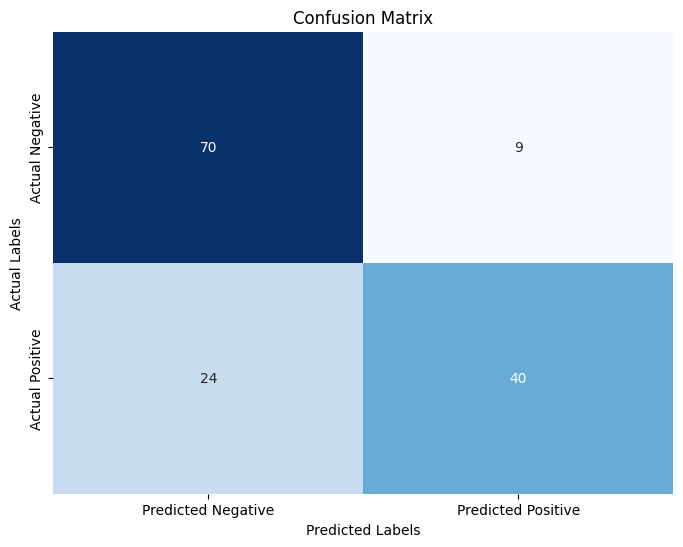

In [27]:
conf_matrix = confusion_matrix(y_val, val_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

#### Confusion Matrix

The confusion matrix provides a detailed breakdown of the model's performance:
The matrix shows the number of true positives, true negatives, false positives, and false negatives:

- **True Positives (TP)**: 40
- **True Negatives (TN)**: 70
- **False Positives (FP)**: 9
- **False Negatives (FN)**: 24

These metrics indicate how well the model is expected to perform on unseen data, providing confidence in the predictions made on the test dataset.

<table style="border-collapse: collapse; width: 50%; font-family: Arial, sans-serif; margin: 0 auto;">
  <tr style="background-color: #f2f2f2;">
    <th style="padding: 10px; text-align: center;"></th>
    <th style="padding: 10px; text-align: center;">Predicted Negative</th>
    <th style="padding: 10px; text-align: center;">Predicted Positive</th>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; background-color: #f2f2f2;">Actual Negative</td>
    <td style="padding: 10px; text-align: center;">70</td>
    <td style="padding: 10px; text-align: center;">9</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align: center; background-color: #f2f2f2;">Actual Positive</td>
    <td style="padding: 10px; text-align: center;">24</td>
    <td style="padding: 10px; text-align: center;">40</td>
  </tr>
</table>

In [28]:
# Re-train the best model with the entire training data
best_model_standard.fit(X_train_standard, y_train_standard)

# Make final predictions on the test set
final_predictions = best_model_standard.predict(X_test_standard)

# Display the first few predictions
print(final_predictions[:10])

[0 0 0 1 0 0 1 0 1 0]
